In [1]:
import pandas as pd
import nltk
import imblearn
import sklearn
import seaborn as sns

In [237]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.ensemble import RandomForestClassifier
import matplotlib.pyplot as plt
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix

In [2]:

'''
df_2=pd.read_csv('A:\python\Computer vision and NLP natural language processing\Stock market data.csv', encoding = "ISO-8859-1")
df_2.head()
'''

'\ndf_2=pd.read_csv(\'A:\\python\\Computer vision and NLP natural language processing\\Stock market data.csv\', encoding = "ISO-8859-1")\ndf_2.head()\n'

In [3]:
df=pd.read_csv('A:\python\Computer vision and NLP natural language processing\Stock market data.csv')
df.head(10)

,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2000-01-03,0,A 'hindrance to operations': extracts from the...,Scorecard,Hughes' instant hit buoys Blues,Jack gets his skates on at ice-cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,...,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl's successor drawn into scandal,The difference between men and women,"Sara Denver, nurse turned solicitor",Diana's landmine crusade put Tories in a panic,Yeltsin's resignation caught opposition flat-f...,Russian roulette,Sold out,Recovering a title
1,2000-01-04,0,Scorecard,The best lake scene,Leader: German sleaze inquiry,"Cheerio, boyo",The main recommendations,Has Cubie killed fees?,Has Cubie killed fees?,Has Cubie killed fees?,...,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA man's extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn't know without the ...,Millennium bug fails to bite
2,2000-01-05,0,Coventry caught on counter by Flo,United's rivals on the road to Rio,Thatcher issues defence before trial by video,Police help Smith lay down the law at Everton,Tale of Trautmann bears two more retellings,England on the rack,Pakistan retaliate with call for video of Walsh,Cullinan continues his Cape monopoly,...,South Melbourne (Australia),Necaxa (Mexico),Real Madrid (Spain),Raja Casablanca (Morocco),Corinthians (Brazil),Tony's pet project,Al Nassr (Saudi Arabia),Ideal Holmes show,Pinochet leaves hospital after tests,Useful links
3,2000-01-06,1,Pilgrim knows how to progress,Thatcher facing ban,McIlroy calls for Irish fighting spirit,Leicester bin stadium blueprint,United braced for Mexican wave,"Auntie back in fashion, even if the dress look...",Shoaib appeal goes to the top,Hussain hurt by 'shambles' but lays blame on e...,...,Putin admits Yeltsin quit to give him a head s...,BBC worst hit as digital TV begins to bite,How much can you pay for...,Christmas glitches,"Upending a table, Chopping a line and Scoring ...","Scientific evidence 'unreliable', defence claims",Fusco wins judicial review in extradition case,Rebels thwart Russian advance,Blair orders shake-up of failing NHS,Lessons of law's hard heart
4,2000-01-07,1,Hitches and Horlocks,Beckham off but United survive,Breast cancer screening,Alan Parker,Guardian readers: are you all whingers?,Hollywood Beyond,Ashes and diamonds,Whingers - a formidable minority,...,Most everywhere: UDIs,Most wanted: Chloe lunettes,Return of the cane 'completely off the agenda',From Sleepy Hollow to Greeneland,Blunkett outlines vision for over 11s,"Embattled Dobson attacks 'play now, pay later'...",Doom and the Dome,What is the north-south divide?,Aitken released from jail,Gone aloft
5,2000-01-10,1,Fifth round draw,BBC unveils secret weapon in ratings war: Sout...,Second Division round-up,European round-up,Third Division round-up,Welfare could claim Killie tie as Caley Thistl...,Ferguson puts brave face on Rio meltdown,Southgate in striking form to pre-empt penalties,...,Time Warner and AOL to merge,Keep up,Waging global war,"Desktop icons, No 1: The Qwerty keyboard",The sec's files,The low down: Workplace bullying,Met 'not equipped' to solve murders,Tranmere tie will not be replayed,Rebel attacks take toll on Russia,Met lent stopped car to Lawrence
6,2000-01-11,1,Man Utd 2 - 0 South Melbourne,How North Atlantic drift could carry away Old ...,Buoyant BBC to show Brazil final live,Tranmere given all-clear in the Cup,United sit poorly with the Doc,Queen's Park peril clouds Hampden future,Waugh hits out at Shoaib reprieve,Knight makes case for Butcher's place,...,I'd like that in writing,Split vote may offer 

In [4]:
#Data preprocessing in the form of a list to give input to a nlp vector int format as output
# I do not need the date and label columns as these are integers but using date I will seperate my data as test and train
#Label 1 is increase in stock price with the given text and 0 is decrease in price with text

train=df[df['Date']<'20150101']
test=df[df['Date']>'20141231']



In [5]:
train.head()


,Date,Label,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,2000-01-03,0,A 'hindrance to operations': extracts from the...,Scorecard,Hughes' instant hit buoys Blues,Jack gets his skates on at ice-cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,...,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl's successor drawn into scandal,The difference between men and women,"Sara Denver, nurse turned solicitor",Diana's landmine crusade put Tories in a panic,Yeltsin's resignation caught opposition flat-f...,Russian roulette,Sold out,Recovering a title
1,2000-01-04,0,Scorecard,The best lake scene,Leader: German sleaze inquiry,"Cheerio, boyo",The main recommendations,Has Cubie killed fees?,Has Cubie killed fees?,Has Cubie killed fees?,...,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA man's extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn't know without the ...,Millennium bug fails to bite
2,2000-01-05,0,Coventry caught on counter by Flo,United's rivals on the road to Rio,Thatcher issues defence before trial by video,Police help Smith lay down the law at Everton,Tale of Trautmann bears two more retellings,England on the rack,Pakistan retaliate with call for video of Walsh,Cullinan continues his Cape monopoly,...,South Melbourne (Australia),Necaxa (Mexico),Real Madrid (Spain),Raja Casablanca (Morocco),Corinthians (Brazil),Tony's pet project,Al Nassr (Saudi Arabia),Ideal Holmes show,Pinochet leaves hospital after tests,Useful links
3,2000-01-06,1,Pilgrim knows how to progress,Thatcher facing ban,McIlroy calls for Irish fighting spirit,Leicester bin stadium blueprint,United braced for Mexican wave,"Auntie back in fashion, even if the dress look...",Shoaib appeal goes to the top,Hussain hurt by 'shambles' but lays blame on e...,...,Putin admits Yeltsin quit to give him a head s...,BBC worst hit as digital TV begins to bite,How much can you pay for...,Christmas glitches,"Upending a table, Chopping a line and Scoring ...","Scientific evidence 'unreliable', defence claims",Fusco wins judicial review in extradition case,Rebels thwart Russian advance,Blair orders shake-up of failing NHS,Lessons of law's hard heart
4,2000-01-07,1,Hitches and Horlocks,Beckham off but United survive,Breast cancer screening,Alan Parker,Guardian readers: are you all whingers?,Hollywood Beyond,Ashes and diamonds,Whingers - a formidable minority,...,Most everywhere: UDIs,Most wanted: Chloe lunettes,Return of the cane 'completely off the agenda',From Sleepy Hollow to Greeneland,Blunkett outlines vision for over 11s,"Embattled Dobson attacks 'play now, pay later'...",Doom and the Dome,What is the north-south divide?,Aitken released from jail,Gone aloft


In [6]:
data=train.iloc[:,2:27]


In [7]:
#Removing other punctuations by a space 
data.replace("[^a-zA-Z]",value="",inplace=True)
             

In [8]:
data.head()


,Top1,Top2,Top3,Top4,Top5,Top6,Top7,Top8,Top9,Top10,...,Top16,Top17,Top18,Top19,Top20,Top21,Top22,Top23,Top24,Top25
0,A 'hindrance to operations': extracts from the...,Scorecard,Hughes' instant hit buoys Blues,Jack gets his skates on at ice-cold Alex,Chaos as Maracana builds up for United,Depleted Leicester prevail as Elliott spoils E...,Hungry Spurs sense rich pickings,Gunners so wide of an easy target,Derby raise a glass to Strupar's debut double,"Southgate strikes, Leeds pay the penalty",...,Flintoff injury piles on woe for England,Hunters threaten Jospin with new battle of the...,Kohl's successor drawn into scandal,The difference between men and women,"Sara Denver, nurse turned solicitor",Diana's landmine crusade put Tories in a panic,Yeltsin's resignation caught opposition flat-f...,Russian roulette,Sold out,Recovering a title
1,Scorecard,The best lake scene,Leader: German sleaze inquiry,"Cheerio, boyo",The main recommendations,Has Cubie killed fees?,Has Cubie killed fees?,Has Cubie killed fees?,Hopkins 'furious' at Foster's lack of Hannibal...,Has Cubie killed fees?,...,On the critical list,The timing of their lives,Dear doctor,Irish court halts IRA man's extradition to Nor...,Burundi peace initiative fades after rebels re...,PE points the way forward to the ECB,Campaigners keep up pressure on Nazi war crime...,Jane Ratcliffe,Yet more things you wouldn't know without the ...,Millennium bug fails to bite
2,Coventry caught on counter by Flo,United's rivals on the road to Rio,Thatcher issues defence before trial by video,Police help Smith lay down the law at Everton,Tale of Trautmann bears two more retellings,England on the rack,Pakistan retaliate with call for video of Walsh,Cullinan continues his Cape monopoly,McGrath puts India out of their misery,Blair Witch bandwagon rolls on,...,South Melbourne (Australia),Necaxa (Mexico),Real Madrid (Spain),Raja Casablanca (Morocco),Corinthians (Brazil),Tony's pet project,Al Nassr (Saudi Arabia),Ideal Holmes show,Pinochet leaves hospital after tests,Useful links
3,Pilgrim knows how to progress,Thatcher facing ban,McIlroy calls for Irish fighting spirit,Leicester bin stadium blueprint,United braced for Mexican wave,"Auntie back in fashion, even if the dress look...",Shoaib appeal goes to the top,Hussain hurt by 'shambles' but lays blame on e...,England's decade of disasters,Revenge is sweet for jubilant Cronje,...,Putin admits Yeltsin quit to give him a head s...,BBC worst hit as digital TV begins to bite,How much can you pay for...,Christmas glitches,"Upending a table, Chopping a line and Scoring ...","Scientific evidence 'unreliable', defence claims",Fusco wins judicial review in extradition case,Rebels thwart Russian advance,Blair orders shake-up of failing NHS,Lessons of law's hard heart
4,Hitches and Horlocks,Beckham off but United survive,Breast cancer screening,Alan Parker,Guardian readers: are you all whingers?,Hollywood Beyond,Ashes and diamonds,Whingers - a formidable minority,Alan Parker - part two,"Thuggery, Toxins and Ties",...,Most everywhere: UDIs,Most wanted: Chloe lunettes,Return of the cane 'completely off the agenda',From Sleepy Hollow to Greeneland,Blunkett outlines vision for over 11s,"Embattled Dobson attacks 'play now, pay later'...",Doom and the Dome,What is the north-south divide?,Aitken released from jail,Gone aloft


In [9]:
#Renaming columns 
data.columns
new_list=[str(i) for i in range(25)]
#Append i to the list in string format





In [10]:
data.columns=new_list
data.columns

Index(['0', '1', '2', '3', '4', '5', '6', '7', '8', '9', '10', '11', '12',
       '13', '14', '15', '16', '17', '18', '19', '20', '21', '22', '23', '24'],
      dtype='object')

In [11]:
data['0']#string format data of first columns


0       A 'hindrance to operations': extracts from the...
1                                               Scorecard
2                       Coventry caught on counter by Flo
3                           Pilgrim knows how to progress
4                                    Hitches and Horlocks
                              ...                        
3970    Brazil declares emergency after 2,400 babies a...
3971    Germany recruits 8,500 teachers to teach Germa...
3972    Pentagon thwarts Obama's effort to close Guant...
3973    Tech companies face criminal charges if they n...
3974    Microsoft Corp said on Wednesday it will begin...
Name: 0, Length: 3975, dtype: object

In [12]:
#Lower case of all letters

for i in new_list:
  data[i] =data[i].str.lower()   #Lower all columns data

In [13]:
data.head()#You can clearly see small letters in data as Beckham becomes beckham 

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,a 'hindrance to operations': extracts from the...,scorecard,hughes' instant hit buoys blues,jack gets his skates on at ice-cold alex,chaos as maracana builds up for united,depleted leicester prevail as elliott spoils e...,hungry spurs sense rich pickings,gunners so wide of an easy target,derby raise a glass to strupar's debut double,"southgate strikes, leeds pay the penalty",...,flintoff injury piles on woe for england,hunters threaten jospin with new battle of the...,kohl's successor drawn into scandal,the difference between men and women,"sara denver, nurse turned solicitor",diana's landmine crusade put tories in a panic,yeltsin's resignation caught opposition flat-f...,russian roulette,sold out,recovering a title
1,scorecard,the best lake scene,leader: german sleaze inquiry,"cheerio, boyo",the main recommendations,has cubie killed fees?,has cubie killed fees?,has cubie killed fees?,hopkins 'furious' at foster's lack of hannibal...,has cubie killed fees?,...,on the critical list,the timing of their lives,dear doctor,irish court halts ira man's extradition to nor...,burundi peace initiative fades after rebels re...,pe points the way forward to the ecb,campaigners keep up pressure on nazi war crime...,jane ratcliffe,yet more things you wouldn't know without the ...,millennium bug fails to bite
2,coventry caught on counter by flo,united's rivals on the road to rio,thatcher issues defence before trial by video,police help smith lay down the law at everton,tale of trautmann bears two more retellings,england on the rack,pakistan retaliate with call for video of walsh,cullinan continues his cape monopoly,mcgrath puts india out of their misery,blair witch bandwagon rolls on,...,south melbourne (australia),necaxa (mexico),real madrid (spain),raja casablanca (morocco),corinthians (brazil),tony's pet project,al nassr (saudi arabia),ideal holmes show,pinochet leaves hospital after tests,useful links
3,pilgrim knows how to progress,thatcher facing ban,mcilroy calls for irish fighting spirit,leicester bin stadium blueprint,united braced for mexican wave,"auntie back in fashion, even if the dress look...",shoaib appeal goes to the top,hussain hurt by 'shambles' but lays blame on e...,england's decade of disasters,revenge is sweet for jubilant cronje,...,putin admits yeltsin quit to give him a head s...,bbc worst hit as digital tv begins to bite,how much can you pay for...,christmas glitches,"upending a table, chopping a line and scoring ...","scientific evidence 'unreliable', defence claims",fusco wins judicial review in extradition case,rebels thwart russian advance,blair orders shake-up of failing nhs,lessons of law's hard heart
4,hitches and horlocks,beckham off but united survive,breast cancer screening,alan parker,guardian readers: are you all whingers?,hollywood beyond,ashes and diamonds,whingers - a formidable minority,alan parker - part two,"thuggery, toxins and ties",...,most everywhere: udis,most wanted: chloe lunettes,return of the cane 'completely off the agenda',from sleepy hollow to greeneland,blunkett outlines vision for over 11s,"embattled dobson attacks 'play now, pay later'...",doom and the dome,what is the north-south divide?,aitken released from jail,gone aloft


In [14]:
data.shape

(3975, 25)

In [15]:
data.iloc[1,0:25]#2nd row data

0                                             scorecard
1                                   the best lake scene
2                         leader: german sleaze inquiry
3                                         cheerio, boyo
4                              the main recommendations
5                                has cubie killed fees?
6                                has cubie killed fees?
7                                has cubie killed fees?
8     hopkins 'furious' at foster's lack of hannibal...
9                                has cubie killed fees?
10                                  a tale of two tails
11              i say what i like and i like what i say
12                             elbows, eyes and nipples
13      task force to assess risk of asteroid collision
14                           how i found myself at last
15                                 on the critical list
16                            the timing of their lives
17                                          dear

In [16]:
#Put this data in a list  through all rows
headlines=[]
for i in data.iloc[1,0:25]:
    #Transversing on each row
    headlines.append(i)
print(headlines)  

'''
#List comprehension
for j in range(0,len(data)):#All row data inserted into a list
   headlines.append(' '.join([str(i) for i in data.iloc[j,0:25]]))# ith  row and all the columns join as a string form put in a and append a to list headlines
'''     

['scorecard', 'the best lake scene', 'leader: german sleaze inquiry', 'cheerio, boyo', 'the main recommendations', 'has cubie killed fees?', 'has cubie killed fees?', 'has cubie killed fees?', "hopkins 'furious' at foster's lack of hannibal appetite", 'has cubie killed fees?', 'a tale of two tails', 'i say what i like and i like what i say', 'elbows, eyes and nipples', 'task force to assess risk of asteroid collision', 'how i found myself at last', 'on the critical list', 'the timing of their lives', 'dear doctor', "irish court halts ira man's extradition to northern ireland", 'burundi peace initiative fades after rebels reject mandela as mediator', 'pe points the way forward to the ecb', 'campaigners keep up pressure on nazi war crimes suspect', 'jane ratcliffe', "yet more things you wouldn't know without the movies", 'millennium bug fails to bite']


"\n#List comprehension\nfor j in range(0,len(data)):#All row data inserted into a list\n   headlines.append(' '.join([str(i) for i in data.iloc[j,0:25]]))# ith  row and all the columns join as a string form put in a and append a to list headlines\n"

In [17]:
data.shape

(3975, 25)

In [95]:
data.head(2)

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,a 'hindrance to operations': extracts from the...,scorecard,hughes' instant hit buoys blues,jack gets his skates on at ice-cold alex,chaos as maracana builds up for united,depleted leicester prevail as elliott spoils e...,hungry spurs sense rich pickings,gunners so wide of an easy target,derby raise a glass to strupar's debut double,"southgate strikes, leeds pay the penalty",...,flintoff injury piles on woe for england,hunters threaten jospin with new battle of the...,kohl's successor drawn into scandal,the difference between men and women,"sara denver, nurse turned solicitor",diana's landmine crusade put tories in a panic,yeltsin's resignation caught opposition flat-f...,russian roulette,sold out,recovering a title
1,scorecard,the best lake scene,leader: german sleaze inquiry,"cheerio, boyo",the main recommendations,has cubie killed fees?,has cubie killed fees?,has cubie killed fees?,hopkins 'furious' at foster's lack of hannibal...,has cubie killed fees?,...,on the critical list,the timing of their lives,dear doctor,irish court halts ira man's extradition to nor...,burundi peace initiative fades after rebels re...,pe points the way forward to the ecb,campaigners keep up pressure on nazi war crime...,jane ratcliffe,yet more things you wouldn't know without the ...,millennium bug fails to bite


In [19]:
len(data)

3975

In [20]:
#List comprehension
headlines=[]
for row in range(0,len(data)):
    headlines.append(' '.join([str(i) for i in data.iloc[row,0:25]]))

In [225]:
headlines[0]

"a 'hindrance to operations': extracts from the leaked reports scorecard hughes' instant hit buoys blues jack gets his skates on at ice-cold alex chaos as maracana builds up for united depleted leicester prevail as elliott spoils everton's party hungry spurs sense rich pickings gunners so wide of an easy target derby raise a glass to strupar's debut double southgate strikes, leeds pay the penalty hammers hand robson a youthful lesson saints party like it's 1999 wear wolves have turned into lambs stump mike catches testy gough's taunt langer escapes to hit 167 flintoff injury piles on woe for england hunters threaten jospin with new battle of the somme kohl's successor drawn into scandal the difference between men and women sara denver, nurse turned solicitor diana's landmine crusade put tories in a panic yeltsin's resignation caught opposition flat-footed russian roulette sold out recovering a title"

In [208]:
#Using normal method of string slicing not list comprehension
head=[]
l=[]
for row in range(0,len(data)):
 for i in data.iloc[row,0:25]:
    l.append(str(i))
    
    

In [209]:
data

,0,1,2,3,4,5,6,7,8,9,...,15,16,17,18,19,20,21,22,23,24
0,a 'hindrance to operations': extracts from the...,scorecard,hughes' instant hit buoys blues,jack gets his skates on at ice-cold alex,chaos as maracana builds up for united,depleted leicester prevail as elliott spoils e...,hungry spurs sense rich pickings,gunners so wide of an easy target,derby raise a glass to strupar's debut double,"southgate strikes, leeds pay the penalty",...,flintoff injury piles on woe for england,hunters threaten jospin with new battle of the...,kohl's successor drawn into scandal,the difference between men and women,"sara denver, nurse turned solicitor",diana's landmine crusade put tories in a panic,yeltsin's resignation caught opposition flat-f...,russian roulette,sold out,recovering a title
1,scorecard,the best lake scene,leader: german sleaze inquiry,"cheerio, boyo",the main recommendations,has cubie killed fees?,has cubie killed fees?,has cubie killed fees?,hopkins 'furious' at foster's lack of hannibal...,has cubie killed fees?,...,on the critical list,the timing of their lives,dear doctor,irish court halts ira man's extradition to nor...,burundi peace initiative fades after rebels re...,pe points the way forward to the ecb,campaigners keep up pressure on nazi war crime...,jane ratcliffe,yet more things you wouldn't know without the ...,millennium bug fails to bite
2,coventry caught on counter by flo,united's rivals on the road to rio,thatcher issues defence before trial by video,police help smith lay down the law at everton,tale of trautmann bears two more retellings,england on the rack,pakistan retaliate with call for video of walsh,cullinan continues his cape monopoly,mcgrath puts india out of their misery,blair witch bandwagon rolls on,...,south melbourne (australia),necaxa (mexico),real madrid (spain),raja casablanca (morocco),corinthians (brazil),tony's pet project,al nassr (saudi arabia),ideal holmes show,pinochet leaves hospital after tests,useful links
3,pilgrim knows how to progress,thatcher facing ban,mcilroy calls for irish fighting spirit,leicester bin stadium blueprint,united braced for mexican wave,"auntie back in fashion, even if the dress look...",shoaib appeal goes to the top,hussain hurt by 'shambles' but lays blame on e...,england's decade of disasters,revenge is sweet for jubilant cronje,...,putin admits yeltsin quit to give him a head s...,bbc worst hit as digital tv begins to bite,how much can you pay for...,christmas glitches,"upending a table, chopping a line and scoring ...","scientific evidence 'unreliable', defence claims",fusco wins judicial review in extradition case,rebels thwart russian advance,blair orders shake-up of failing nhs,lessons of law's hard heart
4,hitches and horlocks,beckham off but united survive,breast cancer screening,alan parker,guardian readers: are you all whingers?,hollywood beyond,ashes and diamonds,whingers - a formidable minority,alan parker - part two,"thuggery, toxins and ties",...,most everywhere: udis,most wanted: chloe lunettes,return of the cane 'completely off the agenda',from sleepy hollow to greeneland,blunkett outlines vision for over 11s,"embattled dobson attacks 'play now, pay later'...",doom and the dome,what is the north-south divide?,aitken released from jail,gone aloft
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3970,"brazil declares emergency after 2,400 babies a...",scientists find big 1500-yr-old viking settlem...,paris attacks: belgian police arrest ninth sus...,wiretapping reveals communication between turk...,russia airstrikes: hundreds of syrian civilans...,pakistan changes neutral position on syrian ci...,north korean diplomat arrested in south africa...,german teachers want 'mein kampf' on syllabus,north korea slave force earns kim jong un regi...,"50,000 yemeni forces preparing to attack saudi...",...,report on sexual exploitation and abuse by pea...,baby girl dies after x-president's son's staff...,china smog sparks r

In [214]:
len(l)


99375

In [234]:
head=[]
a=0
b=25
for i in range(0,3975):
    head.append(' '.join(l[a:b]))
    a=b
    b=b+25
    if b>len(l):
        break
    

In [236]:
head[3974]#head.append(' '.join(l[0:25]))

'microsoft corp said on wednesday it will begin warning users of its outlook.com email service when the company suspects that a government has been trying to hack into their accounts. greek orthodox church: homosexuals are god\'s creation - the church doesn\'t reject people. vladmir putin officially dissolves roscosmos, the russian space agency and will restructure it as a state-run corporation starting january 1, 2016. donald trump could be refused entry to the uk after the home secretary theresa may said she will ban people that are non-conducive to the public good. the petition to ban him has over half million signatures. saudi arabia says its ready to meet any additional oil demand. we will satisfy the demand of our customers. we no longer limit production. if there is demand, we will respond. we have the capacity to respond to demand, saudi oil minister said. new year fireworks and festivities have been cancelled in the belgian capital, brussels, because of terror alert. new speci

In [320]:
cv=CountVectorizer(ngram_range=(2,2))
traindata_x=cv.fit_transform(headlines)
randomclassifier=RandomForestClassifier(n_estimators=200,criterion='entropy')
randomclassifier.fit(traindata_x,train['Label'])
test_transform= []
for row in range(0,len(test)):
    test_transform.append(' '.join(str(x) for x in test.iloc[row,2:27]))
    
test_data = cv.transform(test_transform)
randomclassifier.fit(traindata_x,train['Label'])
predictions = randomclassifier.predict(test_data)
cm=confusion_matrix(test['Label'],predictions)
print(cm)


[[140  46]
 [ 10 182]]


In [321]:
score=accuracy_score(test['Label'],predictions)
print(score)
report=classification_report(test['Label'],predictions)
print(report)

0.8518518518518519
              precision    recall  f1-score   support

           0       0.93      0.75      0.83       186
           1       0.80      0.95      0.87       192

    accuracy                           0.85       378
   macro avg       0.87      0.85      0.85       378
weighted avg       0.86      0.85      0.85       378



In [322]:
#Naive Bias
from sklearn.naive_bayes import MultinomialNB
nb=MultinomialNB()
nb.fit(traindata_x,train['Label'])
predictions=nb.predict(test_data)


In [336]:
import numpy as np
def plt_confusion_matrix(cm,title='Confusiion_matrix'):
     plt.title(title)
     plt.imshow(cm)   
     plt.colorbar()
     labels=['Postitve Values','Negative Values']
     tick=np.arange(len(labels))
     plt.xticks(tick,labels,rotation=45)
     plt.yticks(tick,labels)
     plt.xlabel('True values')
     plt.ylabel('Predicited Values')
     plt.tight_layout()
    

In [337]:
cm=confusion_matrix(test['Label'],predictions)
acc=accuracy_score(test['Label'],predictions)
clas_report=classification_report(test['Label'],predictions)
print('Confusion_matrix')
print(cm)
print('Accuracy')
print(acc)
print('Classification_report')
print('class_report')

Confusion_matrix
[[137  49]
 [  9 183]]
Accuracy
0.8465608465608465
Classification_report
class_report


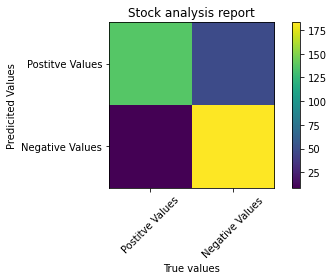

In [338]:

plt_confusion_matrix(cm,'Stock analysis report')